<a href="https://colab.research.google.com/github/Anagha-Sankar/CNN/blob/main/Handwritten_Digits_MNIST_dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape # Each image is of size (28,28)

(28, 28)

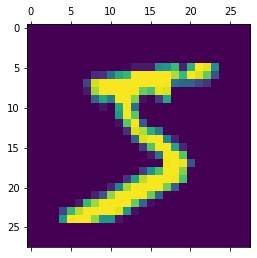

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train = X_train.reshape(len(X_train), 28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

In [15]:
# CNN Model
cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=56, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(56, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.1519 - accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0242 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - accuracy: 0.9936
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0122 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0098 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [18]:
# Testing
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9905


[0.03811972215771675, 0.9904999732971191]

In [26]:
y_pred = cnn.predict(X_test)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10] #first 10 predictions

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [28]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

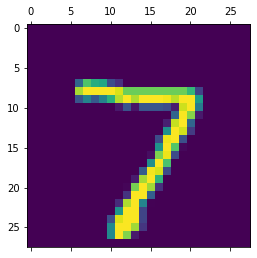

In [22]:
plt.matshow(X_test[0].reshape(28,28)) # plot X_test[0]

In [32]:
# Predicted value
y_classes[0]   # or np.argmax(y_pred[0])

7

In [31]:
# Actual Value
y_test[0]

7

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

